Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613 

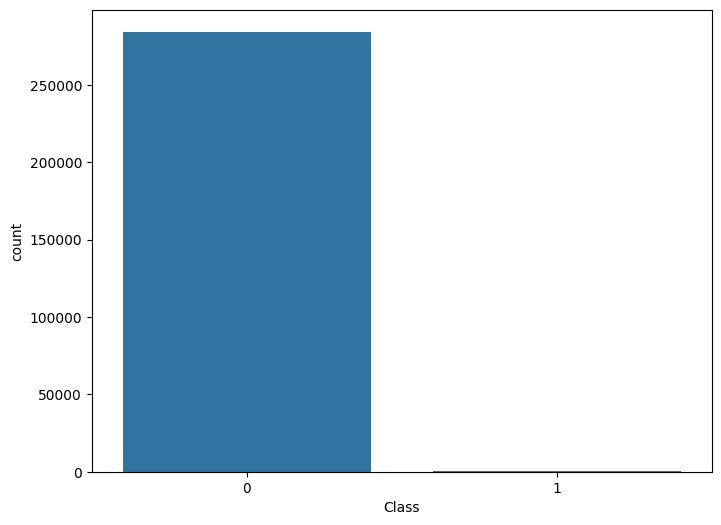

Accuracy: 0.9689956562263686
Classification report:               precision    recall  f1-score   support

           0       0.96      0.98      0.97     56863
           1       0.98      0.96      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



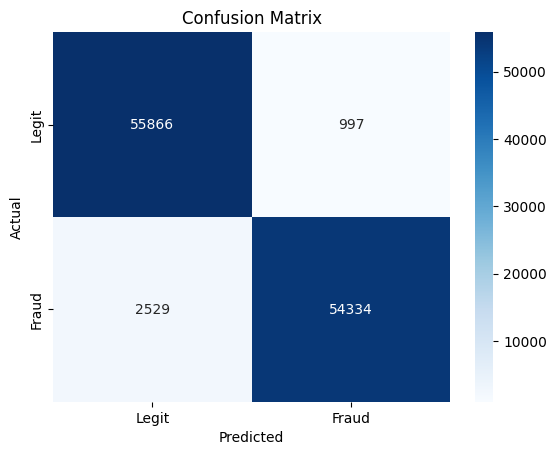

In [35]:
# ===============================================
# Credit Card Fraud Detection using Decision Tree
# Company Use-Case: FinSecure Bank
# ===============================================
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
# -----------------------------------------------
# 2. Load Dataset
# -----------------------------------------------
# Use Kaggle dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

df = pd.read_csv("creditcard.csv")
df.shape
print(df.isnull().sum())
print(df.head(10))

target_col = "Class"
df = df.dropna(subset = [target_col])

imputer = SimpleImputer(strategy = 'median')
x = df.drop(target_col, axis = 1)
x = pd.DataFrame(imputer.fit_transform(x), columns = x.columns)
y = df[target_col]
#Countplot
figure = plt.figure(figsize = (8,6))
sns.countplot(x = target_col, data = df)
plt.show()
#Histplot
sns.histplot(df['Amount'], bins = 50, kde = True)
#Upsampling (Increase number of samples in minority class by randomly picking)
fraud = df[df[target_col] == 1]
legit = df[df[target_col] == 0]

fraud_resampled = resample(fraud, replace = True, n_samples = len(legit), random_state = 42)
df_balanced = pd.concat([legit, fraud_resampled])
#Train_test_split
x = df_balanced.drop(target_col, axis = 1)
y = df_balanced[target_col]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
#Model
model = DecisionTreeClassifier(max_depth = 6, random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt = 'd', cmap = "Blues", annot = True, xticklabels = ['Legit', 'Fraud'], yticklabels = ['Legit', 'Fraud'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<Axes: >

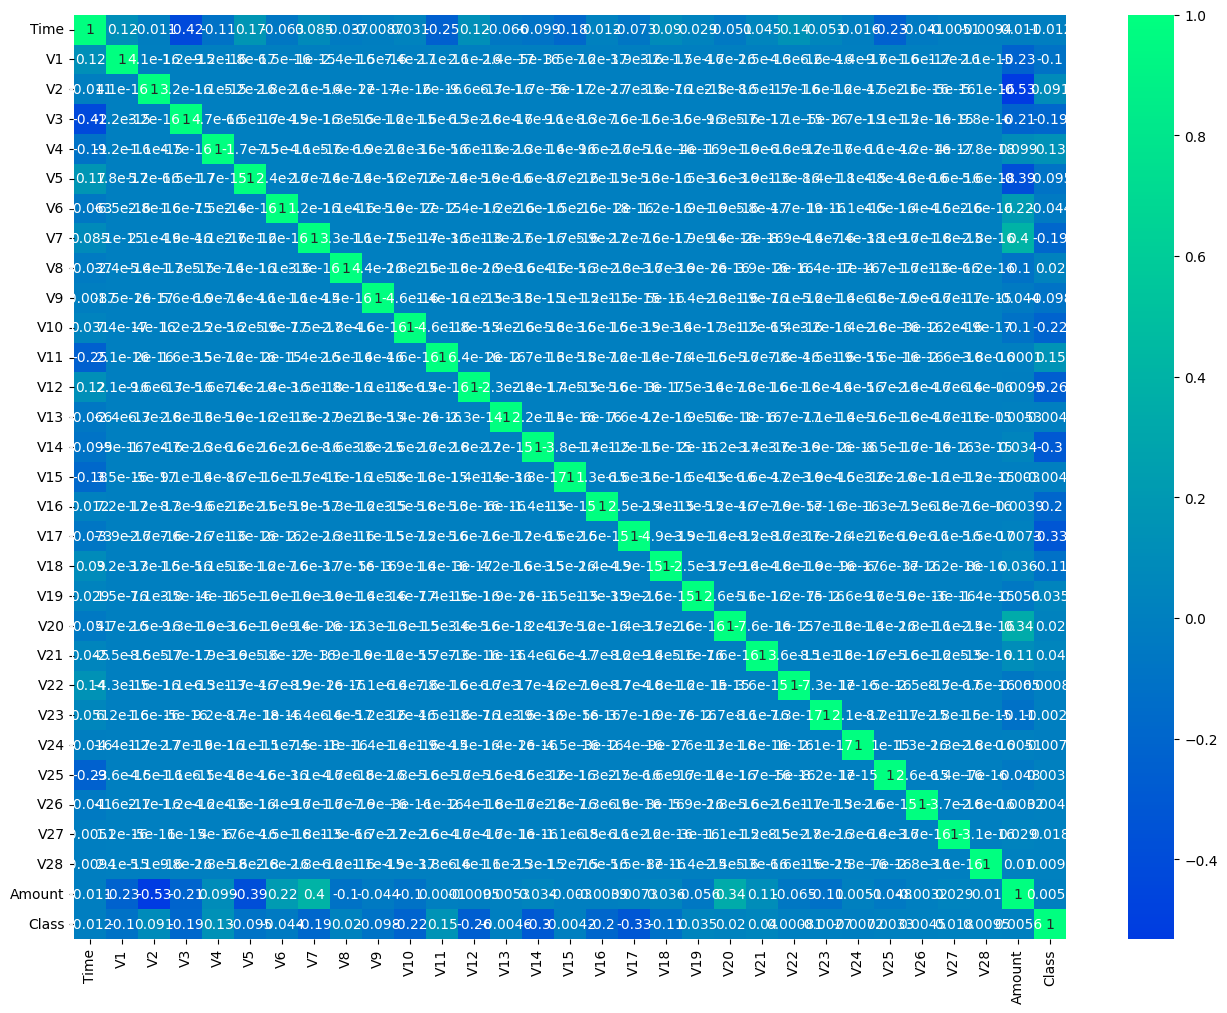

In [ ]:
#Heatmap
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), cmap = 'winter', annot = True, center = 0)

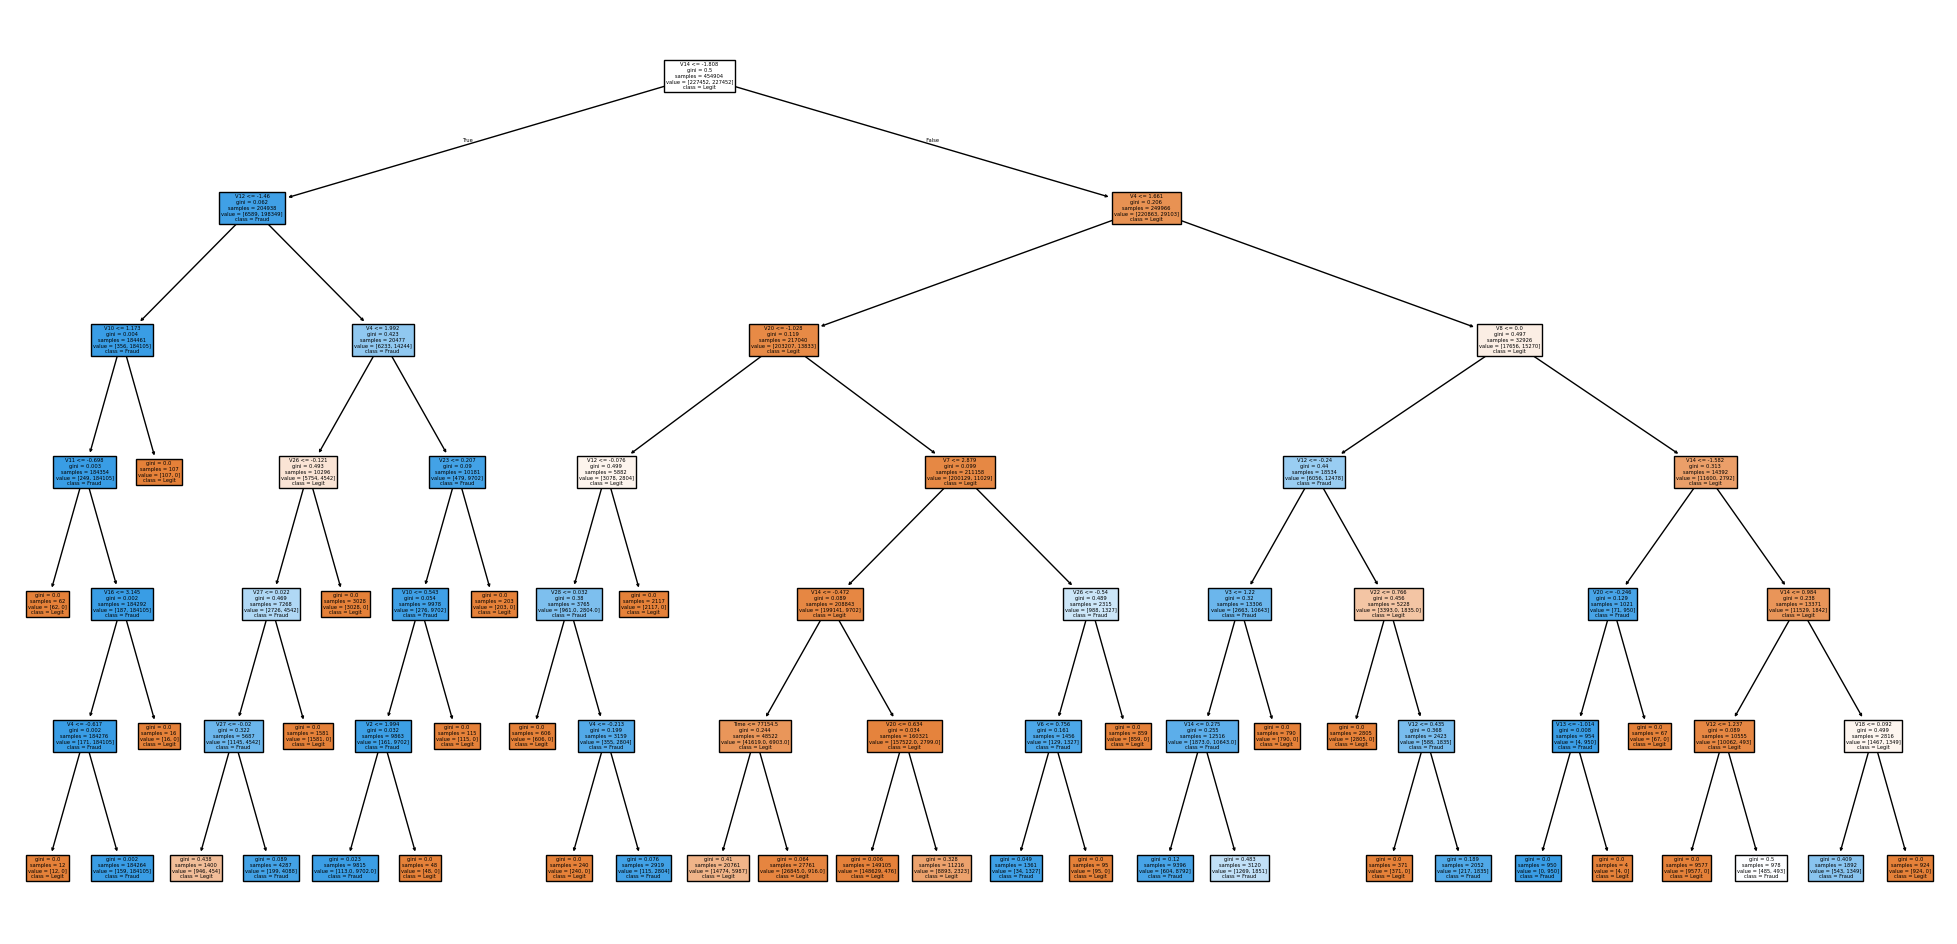

In [37]:
#Plot Tree
plt.figure(figsize=(25,12))
plot_tree(model, filled=True, feature_names = x.columns, class_names=["Legit", "Fraud"])
plt.show()